# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [91]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [18]:
# Extract all rows of data
table = soup.find('table', class_="table")
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [58]:
# Create an empty list
# mars_temp = []
# rows = soup.find_all('tr')
# # print(rows)
# # Loop through the scraped data to create a list of rows
# for row in rows:
#     cells = row.find_all(['th', 'td'])

#     row_heading = cells[0].text.strip()
#     row_data = cells[1].text.strip()
#     mars_temp[row_heading] = row_data
# Extract headers (column names)
headers = [header.text.strip() for header in table.find_all('th')]

# Extract all rows
rows = table.find_all('tr')

# Create a list to store table data
table_data = []

for row in rows:
    cells = row.find_all('td')  # Extract all data cells
    if cells:  # Only process rows that have data
        row_data = [cell.text.strip() for cell in cells]  # Extract text from each cell
        table_data.append(row_data)  # Append row data to list



    

In [59]:
# display table
table_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [63]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(table_data, columns=headers)

In [64]:
# Confirm DataFrame was created successfully
print(mars_temp_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [65]:
# Examine data type of each column
print(mars_temp_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [66]:
# Change data types for data analysis
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)
mars_temp_df['ls'] = mars_temp_df['ls'].astype(int)
mars_temp_df['month'] = mars_temp_df['month'].astype(int)
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)



In [67]:
# Confirm type changes were successful by examining data types again
print(mars_temp_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [70]:
# 1. How many months are there on Mars?
mars_months = mars_temp_df['month'].nunique()
print(mars_months)

12


In [71]:
# 2. How many sols (Martian days) worth of data are there?
sols = len(mars_temp_df['sol'])
print(sols)

1867


In [72]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_temp_df.groupby("month")["min_temp"].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


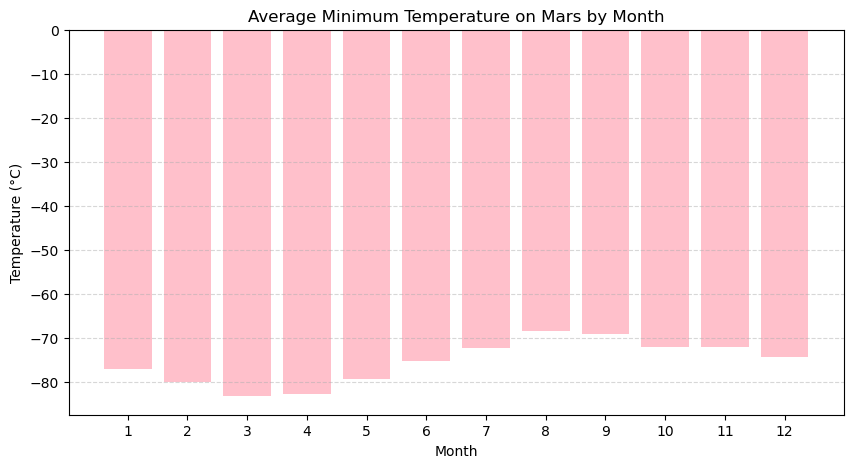

In [80]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 5))
plt.bar(avg_min_temp.index, avg_min_temp, color="pink")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Average Minimum Temperature on Mars by Month")
plt.xticks(avg_min_temp.index)  # Ensure all months are labeled
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

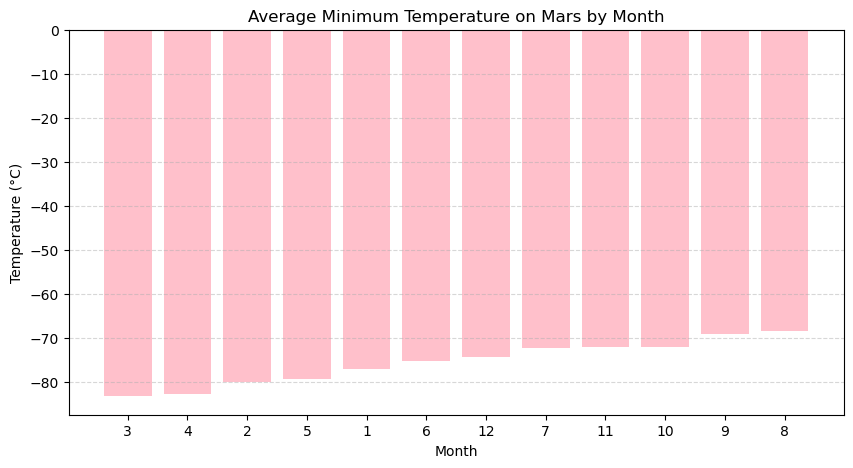

In [112]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Plot the average minimum temperature by month
avg_min_temp_high_low = mars_temp_df.groupby("month")["min_temp"].mean().sort_values(ascending=True)
# print(avg_min_temp_high_low)
plt.figure(figsize=(10, 5))
bar_positions = np.arange(len(avg_min_temp_high_low))  # Bar positions

plt.bar(np.arange(len(avg_min_temp_high_low)), avg_min_temp_high_low, color="pink")



# Labels and title
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Average Minimum Temperature on Mars by Month")
plt.xticks(bar_positions, avg_min_temp_high_low.index)  # Set tick positions to match the bars

plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

In [105]:
# 4. What is the average pressure by month?
avg_pressure_month = mars_temp_df.groupby("month")["pressure"].mean()
print(avg_pressure_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


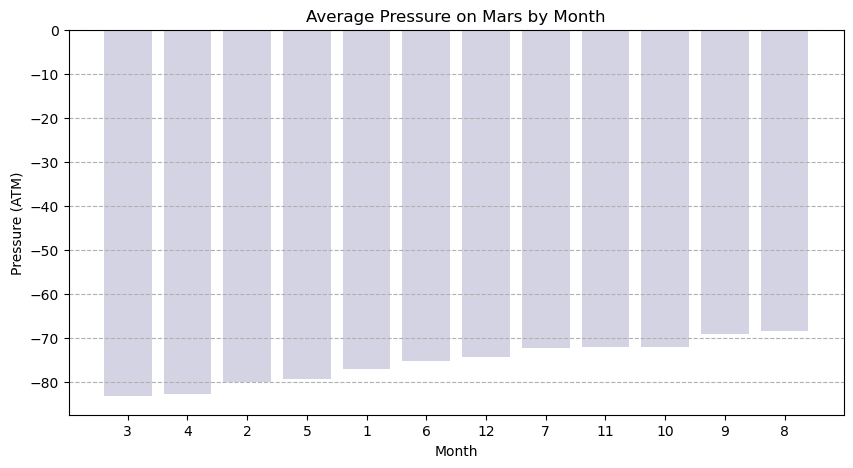

In [115]:
# Plot the average pressure by month
plt.figure(figsize=(10, 5))
bar_positions = np.arange(len(avg_min_temp_high_low))  # Bar positions


plt.bar(np.arange(len(avg_pressure_month)), avg_pressure_month, color="#D3D3E3")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Pressure (ATM)")
plt.title("Average Pressure on Mars by Month")
plt.xticks(bar_positions, avg_min_temp_high_low.index)   # Ensure all months are labeled
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()

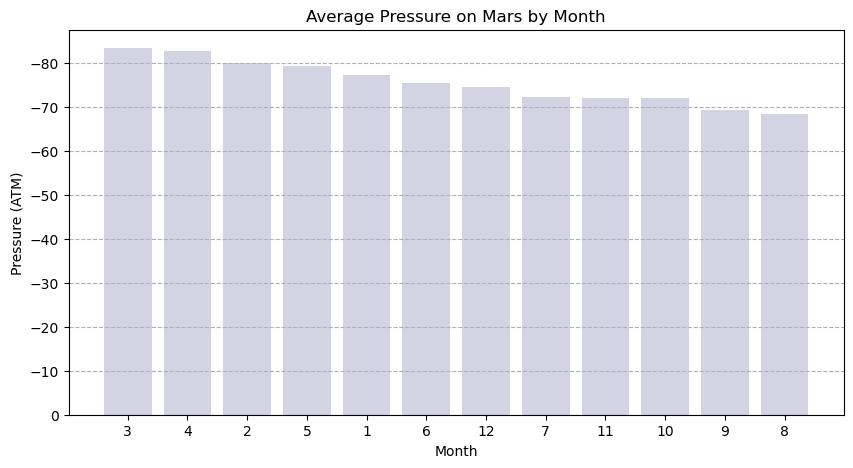

In [116]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
plt.figure(figsize=(10, 5))
bar_positions = np.arange(len(avg_min_temp_high_low))  # Bar positions
avg_pressure_month = mars_temp_df.groupby("month")["min_temp"].mean().sort_values(ascending=True)

plt.bar(np.arange(len(avg_pressure_month)), avg_pressure_month, color="#D3D3E3")


# Labels and title
plt.xlabel("Month")
plt.ylabel("Pressure (ATM)")
plt.title("Average Pressure on Mars by Month")
plt.xticks(bar_positions, avg_min_temp_high_low.index)   # Ensure all months are labeled
plt.gca().invert_yaxis()
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()

In [117]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature # Convert dates to ordinal numbers (days since 0001-01-01)
# Get the earliest and latest dates
start_date = mars_temp_df['terrestrial_date'].min()
end_date = mars_temp_df['terrestrial_date'].max()

# Calculate the number of Earth days
earth_days_in_martian_year = (end_date - start_date).days
print(f"Number of Earth days in the given range of Martian year data: {earth_days_in_martian_year}")




Number of Earth days in the given range of Martian year data: 2021


/var/folders/_9/wksnbqd11271yzlqtplrpbjm0000gn/T/ipykernel_40875/417103548.py:6: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x, y, deg=5)  # 5th-degree polynomial


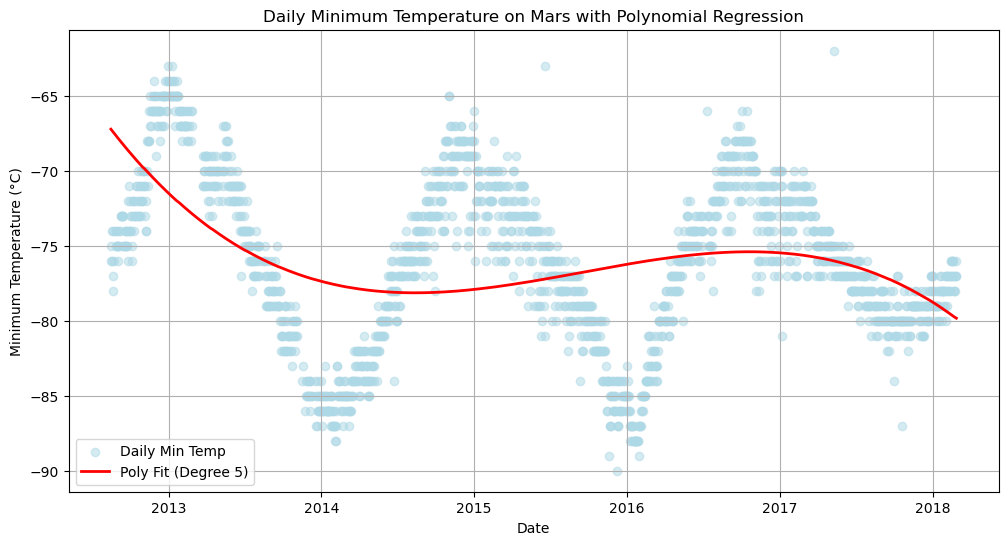

In [118]:
mars_temp_df["date_ordinal"] = mars_temp_df["terrestrial_date"].map(lambda x: x.toordinal())

# Fit a polynomial regression model (degree 5 for a smooth curve)
x = mars_temp_df["date_ordinal"]
y = mars_temp_df["min_temp"]
coefs = np.polyfit(x, y, deg=5)  # 5th-degree polynomial
poly_eq = np.poly1d(coefs)

# Generate smooth x values for plotting the curve
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = poly_eq(x_smooth)

# Plot the original data and the polynomial regression
plt.figure(figsize=(12, 6))
plt.scatter(mars_temp_df["terrestrial_date"], mars_temp_df["min_temp"], color="lightblue", alpha=0.5, label="Daily Min Temp")
plt.plot(pd.to_datetime([pd.Timestamp.fromordinal(int(i)) for i in x_smooth]), y_smooth, color="red", linewidth=2, label="Poly Fit (Degree 5)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars with Polynomial Regression")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### Minimum Temperature

The average minimum temperature on Mars is below -80 degrees celcius in month 3.
The lowest recorded temperature was ~ -90 degrees celcius recorded in 2016.

#### Atmospheric Pressure

The average atmospheric pressure in Mars is the highest in Month 3 with an average of above -80 ATM. 

#### Year Length

The year length of Mars compared to Earth years is much longer with 2021 Earth days in one Mars year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [119]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_temperature_data.csv', index=False)


In [22]:
browser.quit()